# CREACIÓN DE BORDES DE LA PISTA

Imports necesarios

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.spatial.transform import Rotation

Conos que se van a usar (Acceleration)

In [41]:
blue_cones = np.array([[12.999739646911621, 7.999739646911621, 18],[1.500197410583496, 1.500197410583496, 1.5]])
yellow_cones = np.array([[12.999739646911621, 7.999739646911621, 18], [-1.499802589416504, -1.499802589416504, -1.5]])
big_orange_cones = np.array([[2.497919797897339, 2.497919797897339, 2.997919797897339, 2.997919797897339], [1.4981417655944824, -1.5018582344055176, -1.4981417655944824, 1.5018582344055176]])

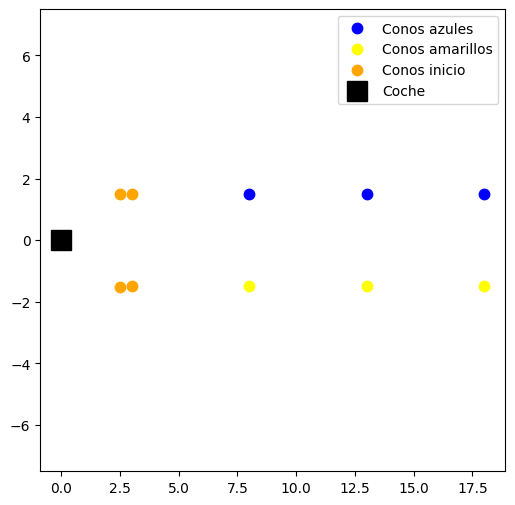

In [42]:
figure, axes = plt.subplots(figsize=(6, 6))

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15, label='Conos azules')
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15, label='Conos amarillos')
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15, label='Conos inicio')
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')
plt.ylim([-7.5, 7.5])
plt.legend()
plt.show()

Para definir cual es el primer cono naranja de cada lado de la pista, se definira una zona en la que podran estar estos conos

In [43]:
firstBlue=np.array([[-2, 0.03], [-2, 2.5], [4, 2.5], [4, 0.03], [-2, 0.03]]) # 0.03 ~ 0, solo para que se vean las 2 lineas
firstYellow=np.array([[-2, -0.03], [-2, -2.5], [4, -2.5], [4, -0.03], [-2, -0.03]])

Visto de modo grafico

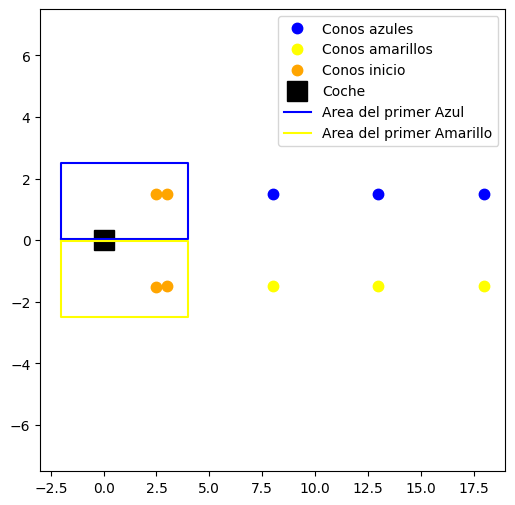

In [44]:
figure, axes = plt.subplots(figsize=(6, 6))

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15, label='Conos azules')
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15, label='Conos amarillos')
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15, label='Conos inicio')
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')
plt.plot(firstBlue[:,0] , firstBlue[:,1],'-', color = 'blue', label = 'Area del primer Azul')
plt.plot(firstYellow[:,0] , firstYellow[:,1],'-', color = 'yellow', label = 'Area del primer Amarillo')
plt.ylim([-7.5, 7.5])
plt.legend()
plt.show()

Ahora, definiremos una funcion la cual pasada la lista de conos naranjas, decide con estas restricciones cual es el lado al que hay que asignar este cono, al lado azul o al amarillo.

In [45]:
def getLadoConosNaranjasGrades (posicion, conos_naranjas):
    restriccionesAzul = np.array([[-2,0], [4, 2.5]])
    restriccionesAmarillo = np.array([[-2,0], [4, -2.5]])
    conos_azules = []
    conos_amarillos = []
    for cono_act in conos_naranjas:
        x = cono_act[0] - posicion[0]
        y = cono_act[1] - posicion[1]
        if (x>=-2 and x<=4):
            if (y > 0):
                if (y<=2.5): # Azul   
                    conos_azules.append(cono_act)
            else:
                if (y>=-2.5): # Amarillo
                    conos_amarillos.append(cono_act)
    return np.array(conos_azules), np.array(conos_amarillos)

Ahora, veamos como funciona la funcion que acabamos de definir. Si se detecta el cono correcto, deberia poner una x del color dtectado encima del cono correcto.

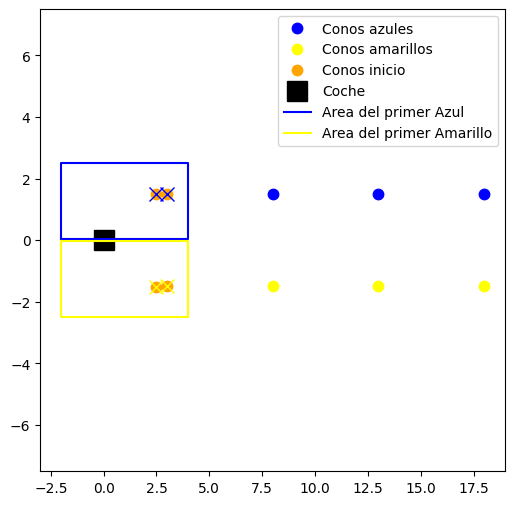

In [46]:
figure, axes = plt.subplots(figsize=(6, 6))

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15, label='Conos azules')
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15, label='Conos amarillos')
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15, label='Conos inicio')
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')
plt.plot(firstBlue[:,0] , firstBlue[:,1],'-', color = 'blue', label = 'Area del primer Azul')
plt.plot(firstYellow[:,0] , firstYellow[:,1],'-', color = 'yellow', label = 'Area del primer Amarillo')

#Selección
conos_naranjas_azules, conos_naranjas_amarillos = getLadoConosNaranjasGrades([0,0], np.transpose(big_orange_cones))
plt.plot(conos_naranjas_azules[:, 0], conos_naranjas_azules[:, 1], 'x', markersize=10, color='blue')
plt.plot(conos_naranjas_amarillos[:, 0], conos_naranjas_amarillos[:, 1], 'x', markersize=10, color='yellow')

plt.ylim([-7.5, 7.5])
plt.legend()
plt.show()

Entonces, los primeros conos de la lista de cada lado seran los conos naranjas

In [47]:
lado_azul = conos_naranjas_azules
lado_amarillo = conos_naranjas_amarillos

Ahora, una vez que hemos unido el primer cono naranja con su respectivo lado, lo uniremos con el primer cono azul (El mas cercano). Para esto, definiremos una funcion que detecta cual es el punto mas cercano respecto a una referencia.

In [48]:
def getCercano(centro, lista):
    respuesta = lista[0]
    iRes = 0
    if (len(lista) > 0):
        i = 0
        dist = 10000
        for act in lista:
            distAct = math.hypot(act[0] - centro[0], act[1] - centro[1])
            if (dist>distAct):
                dist = distAct
                respuesta = act
                iRes = i
            i = i + 1
        conos = np.delete(lista, iRes, 0)
        return respuesta, conos

In [49]:
cercano, blue_cones_filtered = getCercano(lado_azul[-1], np.transpose(blue_cones)) # -1 para dar el ultimo elemento
lado_azul = np.vstack((lado_azul, cercano))
#lado_azul = np.append(lado_azul, cercano)
print(cercano)

[7.99973965 1.50019741]


Despues de unir con el cono mas cercano, tendremos la primera orientación del lado azul, como se ve en el siguiente grafico

In [50]:
lado_azul

array([[2.4979198 , 1.49814177],
       [2.9979198 , 1.50185823],
       [7.99973965, 1.50019741]])

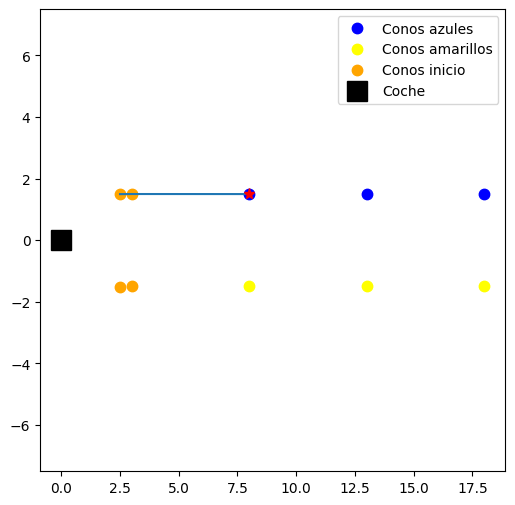

In [51]:
figure, axes = plt.subplots(figsize=(6, 6))

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15, label='Conos azules')
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15, label='Conos amarillos')
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15, label='Conos inicio')

# Imprimimos la selección de cono
plt.plot(lado_azul[:,0], lado_azul[:,1], '-')

plt.plot(cercano[0], cercano[1], '*', color = 'red', markersize = 8)
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')
plt.ylim([-7.5, 7.5])
plt.legend()
plt.show()

Ahora, se definira una zona de busqueda donde podra estar el siguiente cono

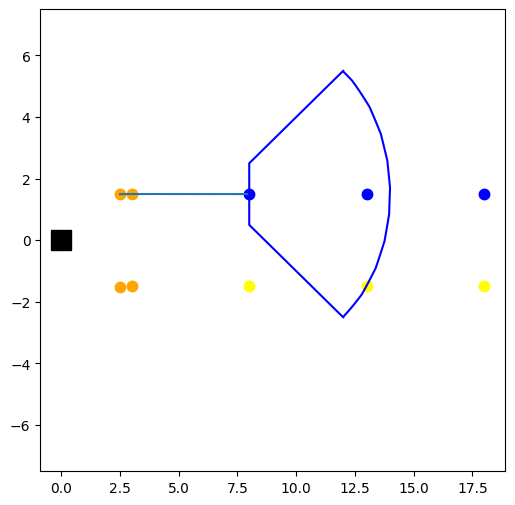

In [52]:
figure, axes = plt.subplots(figsize=(6, 6))
plt.ylim([-7.5, 7.5])

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15)
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15)
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15)
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')

# Imprimimos lado azul
plt.plot(lado_azul[:,0], lado_azul[:,1], '-')

xBox=[cercano[0]+4, cercano[0], cercano[0], cercano[0]+4]
yBox=[cercano[1]-4, cercano[1]-1, cercano[1]+1, cercano[1]+4]
plt.plot(xBox, yBox,'-', color = 'blue')

xCircle = np.linspace( cercano[0]+4 , cercano[0]+6 , 20)
yCircle = np.linspace( cercano[1]-5, cercano[0]+5 , 20 )
a, b = np.meshgrid( xCircle , yCircle )
rad = 5
C = (a-(cercano[0]+1)) ** 2 + (b-cercano[1]) ** 2 - rad**2

axes.contour( a , b , C , [0] , colors = 'blue')

plt.show()

Una vez definida la zona, se tendra que crear una función para que detecte si un punto pertenece a esta zona o no

In [53]:
def isNextCone(actCone, posibleNext):
    x = posibleNext[0] - actCone[0]
    y = posibleNext[1] - actCone[1]
        
    if (x>=0 and x<4): 
        return (y<=((3*x)/4+1) and y>=((-3*x)/4-1))
    elif (x>=4 and x<=6):
        return ((x-1)**2+y**2<=25)
    else:
        return False

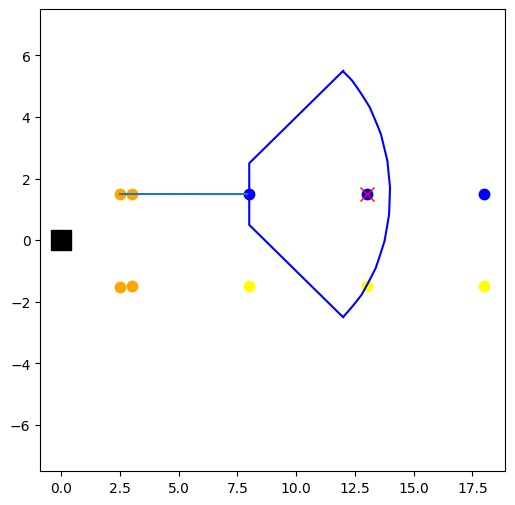

In [54]:
figure, axes = plt.subplots(figsize=(6, 6))
plt.ylim([-7.5, 7.5])

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15)
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15)
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15)
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')

# Imprimimos lado azul
plt.plot(lado_azul[:,0], lado_azul[:,1], '-')

xBox=[cercano[0]+4, cercano[0], cercano[0], cercano[0]+4]
yBox=[cercano[1]-4, cercano[1]-1, cercano[1]+1, cercano[1]+4]
plt.plot(xBox, yBox,'-', color = 'blue')

xCircle = np.linspace( cercano[0]+4 , cercano[0]+6 , 20)
yCircle = np.linspace( cercano[1]-5, cercano[0]+5 , 20 )
a, b = np.meshgrid( xCircle , yCircle )
rad = 5
C = (a-(cercano[0]+1)) ** 2 + (b-cercano[1]) ** 2 - rad**2

axes.contour( a , b , C , [0] , colors = 'blue')

siguiente, blue_cones_filtered = getCercano(cercano, blue_cones_filtered)
if isNextCone(cercano, siguiente):
    plt.plot(siguiente[0], siguiente[1], 'x', markersize=10, color='red')
    lado_azul = np.vstack((lado_azul, siguiente))
plt.show()

Por ejemplo, si intentamos analizar el ultimo cono que queda en la lista, nos daremos cuenta que ese no es el siguiente

In [55]:
isNextCone(cercano, blue_cones_filtered[0])

False

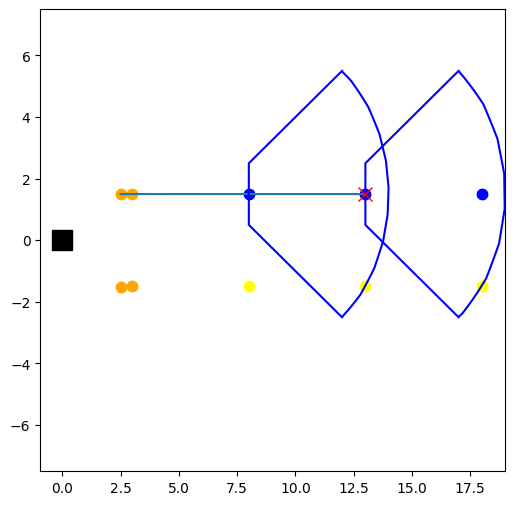

In [56]:
figure, axes = plt.subplots(figsize=(6, 6))
plt.ylim([-7.5, 7.5])

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15)
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15)
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15)
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')

# Imprimimos lado azul
plt.plot(lado_azul[:,0], lado_azul[:,1], '-')

xBox=[cercano[0]+4, cercano[0], cercano[0], cercano[0]+4]
yBox=[cercano[1]-4, cercano[1]-1, cercano[1]+1, cercano[1]+4]
plt.plot(xBox, yBox,'-', color = 'blue')

xCircle = np.linspace( cercano[0]+4 , cercano[0]+6 , 20)
yCircle = np.linspace( cercano[1]-5, cercano[0]+5 , 20 )
a, b = np.meshgrid( xCircle , yCircle )
rad = 5
C = (a-(cercano[0]+1)) ** 2 + (b-cercano[1]) ** 2 - rad**2

axes.contour( a , b , C , [0] , colors = 'blue')

xBox=[siguiente[0]+4, siguiente[0], siguiente[0], siguiente[0]+4]
yBox=[siguiente[1]-4, siguiente[1]-1, siguiente[1]+1, siguiente[1]+4]
plt.plot(xBox, yBox,'-', color = 'blue')

xCircle = np.linspace( siguiente[0]+4 , siguiente[0]+6 , 20)
yCircle = np.linspace( siguiente[1]-5, siguiente[0]+5 , 20 )
a, b = np.meshgrid( xCircle , yCircle )
rad = 5
C = (a-(siguiente[0]+1)) ** 2 + (b-siguiente[1]) ** 2 - rad**2

axes.contour( a , b , C , [0] , colors = 'blue')

plt.plot(siguiente[0], siguiente[1], 'x', markersize=10, color='red')
plt.show()

In [57]:
yellow_cones

array([[12.99973965,  7.99973965, 18.        ],
       [-1.49980259, -1.49980259, -1.5       ]])

Ahora, tenemos que meter todo esto dentro de una funcion iterativa, donde ira eligiendo poco a poco cuales son los lados de la pista para poder hacer la correcta planificación

In [58]:
zonaSeleccionPoints = np.array([[0.0, -1.0,  0.0],
[0.00, 1.00, 0.00],
[4.00, 4.00, 0.00],
[4.333333333333334, 3.726779962499649, 0],
[4.888888888888889, 3.1426968052735442, 0],
[5.444444444444445, 2.2906142364542554, 0],
[6.0, 0.0, 0],
[5.444444444444445, -2.2906142364542554, 0],
[4.888888888888889, -3.1426968052735442, 0],
[4.333333333333334, -3.726779962499649, 0],
[4.00, -4.00, 0.00],
[0.00, -1.00, 0.00],
])


In [59]:
def isNextCone(actCone, posibleNext, jaw):    
    #print(actCone)
    #print(posibleNext)
    #print('---')
    r = Rotation.from_euler('z', -jaw, degrees=True)
    p = [posibleNext[0] - actCone[0], posibleNext[1] - actCone[1], 0]    
    pNew = r.apply(p)
    
    x = pNew[0]
    y = pNew[1]
    
    if (x>=0 and x<4): 
        return (y<=((3*x)/4+1) and y>=((-3*x)/4-1))
    elif (x>=4 and x<=6):
        return ((x-1)**2+y**2<=25)
    else:
        return False

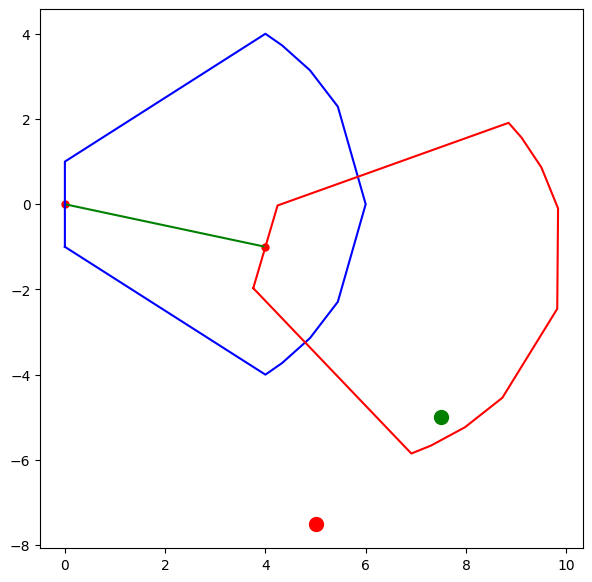

In [60]:
figure, axes = plt.subplots(figsize=(7, 7))
#plt.xlim([-10, 10])
#plt.ylim([-10, 10])



# Hay que girar respecto al JAW  (Angulo que sacamos)

p1 = [0,0,0]
p2 = [4,-1,0]
p = np.array([p1, p2])

v = [1,0,0]
if (p2[0]-p1[0]) != 0:
    jaw = math.degrees(math.atan((p1[1]-p2[1])/(p1[0]-p2[0])))
else:
    jaw = 0

r = Rotation.from_euler('z', jaw, degrees=True)

plt.plot(p[:,0], p[:,1], '.', markersize=10, color='red')

plt.plot(p[:,0], p[:,1], '-', color='green')

zonaSeleccionPoints1 = zonaSeleccionPoints + p1
plt.plot(zonaSeleccionPoints1[:,0], zonaSeleccionPoints1[:,1], '-', color='blue')

zonaSeleccionPointsRot = r.apply(zonaSeleccionPoints)
zonaSeleccionPointsRot = zonaSeleccionPointsRot+p2
plt.plot(zonaSeleccionPointsRot[:,0], zonaSeleccionPointsRot[:,1], '-', color='red')


dentro = [7.5,-5,0]
fuera = [5,-7.5,0]

if isNextCone(p2, dentro, jaw):
    plt.plot(dentro[0], dentro[1], 'o', color='green', markersize=10, label='dentro')
else:
    plt.plot(dentro[0], dentro[1], 'o', color='red', markersize=10, label='dentro')
    
if isNextCone(p2, fuera, jaw):
    plt.plot(fuera[0], fuera[1], 'o', color='green', markersize=10, label='dentro')
else:
    plt.plot(fuera[0], fuera[1], 'o', color='red', markersize=10, label='dentro')
    
plt.show()

In [61]:
# Las listas tienen que ser de NUMPY, [x,y,z]
def trackBoundingsRecursive(trackedCones, untrackedCones, reference, jaw, plot):
    # No quedan mas conos
    if (untrackedCones.shape[0] == 0):
        return trackedCones, untrackedCones
    
    # Quedan mas conos
    flag = False
    i = 0
    while (i < untrackedCones.shape[0] and not flag):
        coneAct = untrackedCones[i]        
        if isNextCone(reference, coneAct, jaw): # Es el siguiente cono
            flag = True            
            untrackedCones = np.delete(untrackedCones, i, axis=0)
            trackedCones = np.append(trackedCones, np.array([coneAct]), axis=0)
        
            if (reference[0]-coneAct[0]) < 0:
                jaw = 180 + math.degrees(math.atan((reference[1]-coneAct[1])/(reference[0]-coneAct[0])))
            if (reference[0]-coneAct[0]) != 0:
                jaw = math.degrees(math.atan((reference[1]-coneAct[1])/(reference[0]-coneAct[0])))
            else:
                jaw = 0
            
            if plot:
                print(jaw)
                r = Rotation.from_euler('z', jaw, degrees=True)
                
                zonaSeleccionPointsRot = r.apply(zonaSeleccionPoints)
                zonaSeleccionPointsRot = zonaSeleccionPointsRot+reference
                plt.plot(zonaSeleccionPointsRot[:,0], zonaSeleccionPointsRot[:,1], '-', color='red')
                plt.plot(reference[0], reference[1] , '.', color='orange', markersize=15)
                if (jaw<0):
                    print(list(reference))
                    print(list(coneAct))
            trackedCones, untrackedCones = trackBoundingsRecursive(trackedCones, untrackedCones, coneAct, jaw, plot) 
            
        else: # No es el siguiente cono
            i += 1
    return trackedCones, untrackedCones

In [62]:
blueConesList = np.transpose(np.array(blue_cones))
trackedConesBlue = np.array([conos_naranjas_azules[1]])
trackedConesBlue, untrackedCones = trackBoundingsRecursive(trackedConesBlue, blueConesList, conos_naranjas_azules[1], 0, False)

In [63]:
yellowConesList = np.transpose(np.array(yellow_cones))
trackedConesYellow = np.array([conos_naranjas_amarillos[1]])
trackedConesYellow, untrackedCones = trackBoundingsRecursive(trackedConesYellow, yellowConesList, conos_naranjas_amarillos[1], 0, False)

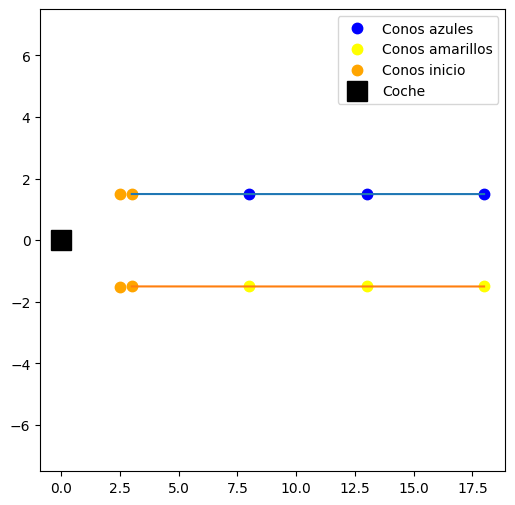

In [64]:
figure, axes = plt.subplots(figsize=(6, 6))

plt.plot(blue_cones[0], blue_cones[1] , '.', color='blue', markersize=15, label='Conos azules')
plt.plot(yellow_cones[0], yellow_cones[1],'.', color='yellow', markersize=15, label='Conos amarillos')
plt.plot(big_orange_cones[0], big_orange_cones[1],'.',color='orange', markersize=15, label='Conos inicio')
plt.plot(0,0,'s', markersize=15, label='Coche', color = 'black')
plt.ylim([-7.5, 7.5])
plt.legend()

plt.plot(trackedConesBlue[:,0], trackedConesBlue[:,1], '-')
plt.plot(trackedConesYellow[:,0], trackedConesYellow[:,1], '-')
plt.show()

In [65]:
blue_cones = []
yellow_cones = []
big_orange_cones = []
with open('pista_rand.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader: #tag, x, y, dir, x_variance, y_variance, xy_covariance
        tag = row['tag']
        x = float(row['x'])
        y = float(row['y'])
        #blue, yellow, big_orange
        
        if (tag == 'blue'):
            blue_cones.append([x, y, 0.00])
        elif (tag== 'yellow'):
            yellow_cones.append([x,y,0.00])
        elif (tag == 'big_orange'):
            big_orange_cones.append([x,y,0.00])

blue_cones = np.array(blue_cones)
yellow_cones = np.array(yellow_cones)
big_orange_cones = np.array(big_orange_cones)

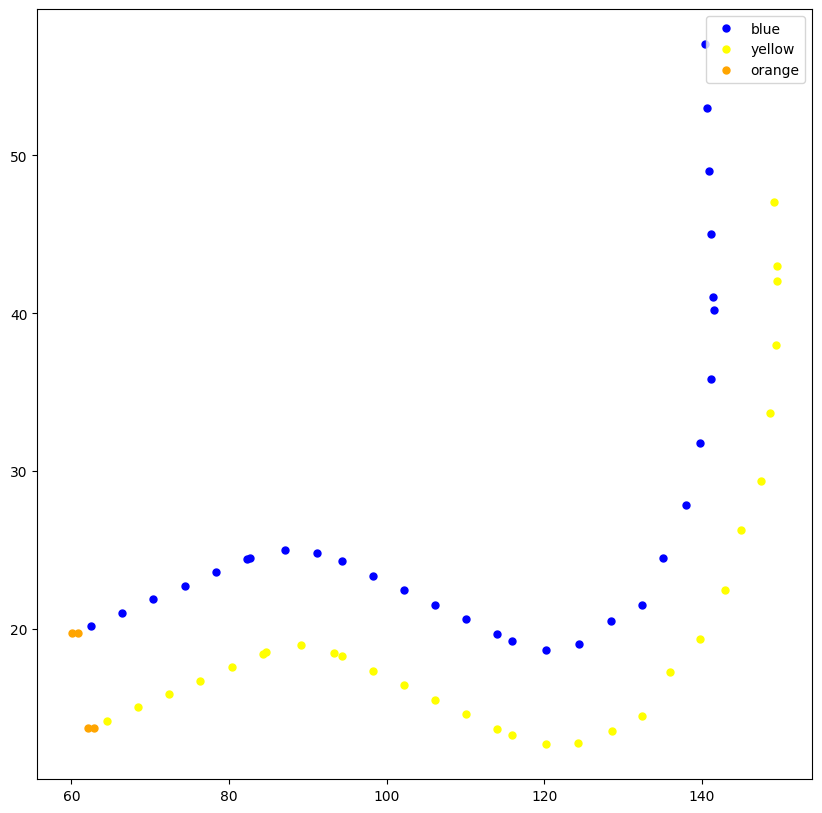

In [66]:
figure, axes = plt.subplots(figsize=(10, 10))

plt.plot(blue_cones[:30,0], blue_cones[:30,1] , '.', color='blue', markersize=10, label='blue')
plt.plot(yellow_cones[:30,0], yellow_cones[:30,1],'.', color='yellow', markersize=10, label='yellow')
plt.plot(big_orange_cones[:,0], big_orange_cones[:,1],'.', color='orange', markersize=10, label='orange')
plt.legend()


plt.show()

12.851741582929064
12.11835994256679
12.118359942566833
12.118359942566743
12.11835994256684
6.461217085423918
-7.697313768683572
[89.09456432084593, 18.989464126612212, 0.0]
[94.27251430277244, 18.28962501890837, 0.0]
-13.081640057433146
[94.27251430277244, 18.28962501890837, 0.0]
[98.22623524030229, 17.37090078039308, 0.0]
-13.081640057433097
[98.22623524030229, 17.37090078039308, 0.0]
[102.17995617783214, 16.45217654187779, 0.0]
-13.081640057433146
[102.17995617783214, 16.45217654187779, 0.0]
[106.13367711536199, 15.533452303362498, 0.0]
-13.08164005743319
[106.13367711536199, 15.533452303362498, 0.0]
[110.08739805289183, 14.614728064847206, 0.0]
-13.081640057433102
[110.08739805289183, 14.614728064847206, 0.0]
[115.86639759779221, 13.271864711525694, 0.0]
-7.424497200290332
[115.86639759779221, 13.271864711525694, 0.0]
[120.20020743471582, 12.707116778001225, 0.0]
0.993764664332416
10.061217085423975
14.206150281175548
38.50524134783246
28.049891413951915
45.03264565685277
62.00214

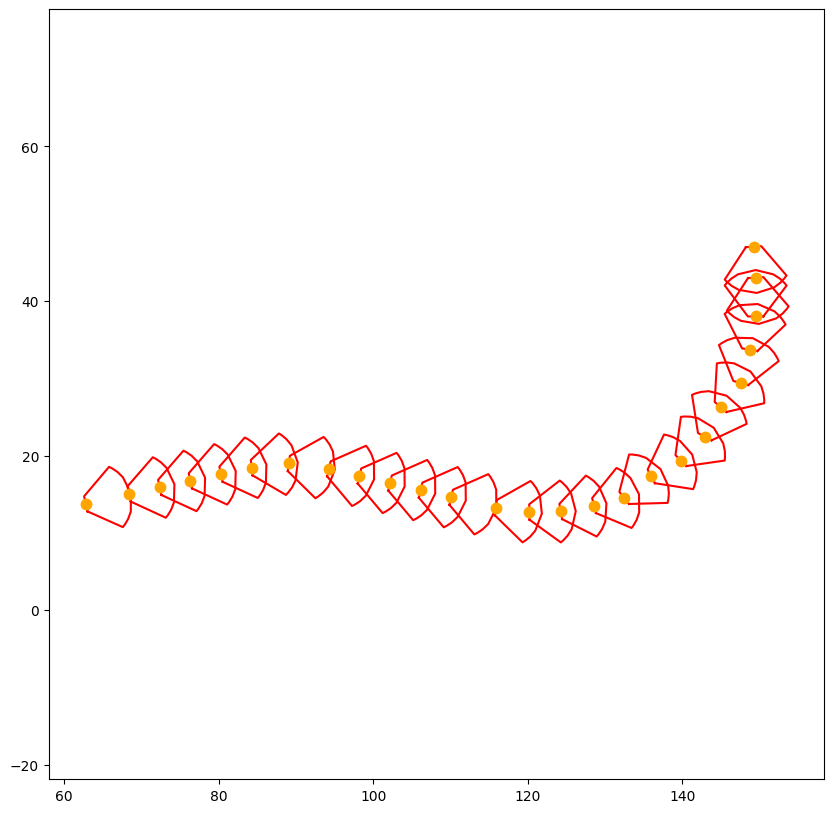

In [67]:
prueba = np.copy(yellow_cones)
tracked = np.copy(big_orange_cones[:2])
no_tracked = np.copy(yellow_cones[:30])
np.take(no_tracked,np.random.permutation(no_tracked.shape[0]),axis=0,out=no_tracked);

figure, axes = plt.subplots(figsize=(10, 10))
plt.axis('equal')

track, untrack = trackBoundingsRecursive(tracked, no_tracked, tracked[-1], jaw, True)
print(untrack)
#plt.plot(yellow_cones[:10,0], yellow_cones[:10,1] , '.', color='yellow', markersize=10, label='yellow')
#trackedConesYellow = np.array([conos_naranjas_amarillos[1]])
#trackedConesYellow, untrackedCones = trackBoundingsRecursive(trackedConesYellow, yellowConesList, conos_naranjas_amarillos[1], 0)
plt.show()

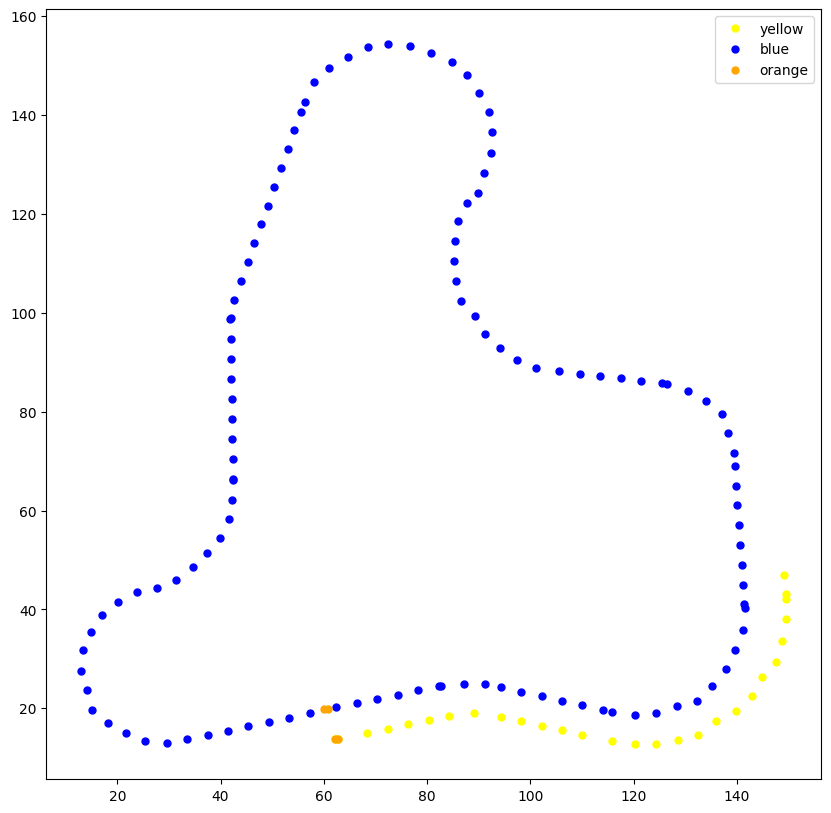

In [68]:
figure, axes = plt.subplots(figsize=(10, 10))

plt.plot(track[:,0], track[:,1] , '.', color='yellow', markersize=10, label='yellow')
plt.plot(blue_cones[:,0], blue_cones[:,1],'.', color='blue', markersize=10, label='blue')
plt.plot(big_orange_cones[:,0], big_orange_cones[:,1],'.', color='orange', markersize=10, label='orange')
plt.legend()


plt.show()

93.8897885139957


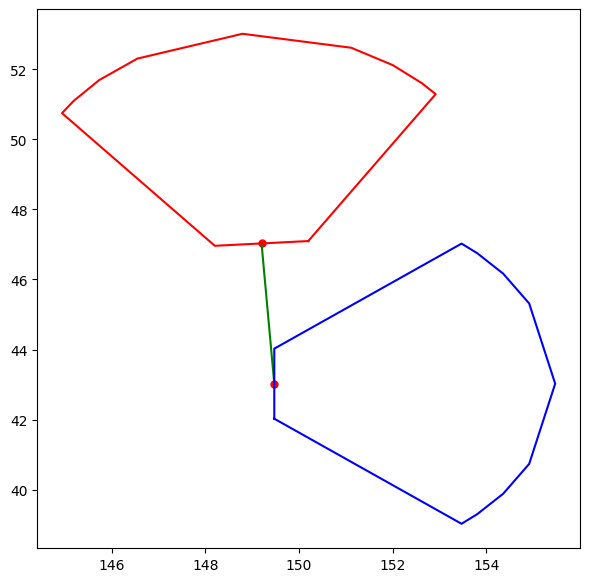

In [69]:
figure, axes = plt.subplots(figsize=(7, 7))
#plt.xlim([-10, 10])
#plt.ylim([-10, 10])



# Hay que girar respecto al JAW  (Angulo que sacamos)

p1 = [149.470820010242, 43.024819054606894, 0.0]
p2 = [149.19852308556352, 47.02953244298311, 0.0]

p = np.array([p1, p2])

v = [1,0,0]
if (p2[0]-p1[0]) < 0:
    jaw = 180 + math.degrees(math.atan((p1[1]-p2[1])/(p1[0]-p2[0])))
elif (p2[0]-p1[0]) != 0:
    jaw = math.degrees(math.atan((p1[1]-p2[1])/(p1[0]-p2[0])))
else:
    jaw = 0

print(jaw)
r = Rotation.from_euler('z', jaw, degrees=True)

plt.plot(p[:,0], p[:,1], '.', markersize=10, color='red')

plt.plot(p[:,0], p[:,1], '-', color='green')

zonaSeleccionPoints1 = zonaSeleccionPoints + p1
plt.plot(zonaSeleccionPoints1[:,0], zonaSeleccionPoints1[:,1], '-', color='blue')

zonaSeleccionPointsRot = r.apply(zonaSeleccionPoints)
zonaSeleccionPointsRot = zonaSeleccionPointsRot+p2
plt.plot(zonaSeleccionPointsRot[:,0], zonaSeleccionPointsRot[:,1], '-', color='red')



    
plt.show()

In [70]:
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

class TrackBoundings:
    def __init__(self):
        self.restriccionesAzul = np.array([[-2, 0.02, 0], [-2,4, 0], [4, 4.0, 0], [4, 0.02, 0], [-2, 0.02, 0]])
        self.restriccionesAmarillo = np.array([[-2, -0.02, 0], [-2,-4, 0], [4, -4.0, 0], [4, -0.02, 0], [-2, -0.02, 0]])
        self.zonaSeleccionPoints = np.array([[0.0, -1.0, 0.0],
                                           [0.0, 1.0, 0.0],
                                           [2.5, 4.0, 0.0],
                                           [2.833333333333334, 3.726779962499649, 0],
                                           [3.388888888888889, 3.1426968052735442, 0],
                                           [3.944444444444445, 2.2906142364542554, 0],
                                           [4.5, 0.0, 0],
                                           [3.944444444444445, -2.2906142364542554, 0],
                                           [3.388888888888889, -3.1426968052735442, 0],
                                           [2.833333333333334, -3.726779962499649, 0],
                                           [2.5, -4.0, 0.0],
                                           [0.0, -1.0, 0.0]])          
                                        # ec1: (x+0.5)^(2)+y^(2)=25
                                        # ec2(x)= ((3)/(2.5)) x+1
                                        # ec3(x)= -((3)/(2.5)) x-1
    def initializePlot (self):
        figure, axes = plt.subplots(figsize=(15, 15))
        #imgCoche = AnnotationBbox(self.get_image('img/ads.png', zoom=0.22), (-1, 0), frameon = False)
        #axes.add_artist(imgCoche)
        plt.axis('equal')

    def getLadoConosNaranjasGrades(self, posicion, conos_naranjas, jaw, plot = False):
        r = Rotation.from_euler('z', -jaw, degrees=True)
        conos_azules = []
        conos_amarillos = []
        for cono_act in conos_naranjas:

            # cono_act_rot = r.apply(cono_act)
            x = cono_act[0] - posicion[0]
            y = cono_act[1] - posicion[1]
            act = [x, y, 0]
            act_rot = r.apply(act)
            if (act_rot[0] >= -2 and act_rot[0] <= 4):
                if (act_rot[1] > 0):
                    if (act_rot[1] <= 4.0):  # Azul
                        conos_azules.append(cono_act)
                else:
                    if (act_rot[1] >= -4.0):  # Amarillo
                        conos_amarillos.append(cono_act)
        #return np.array(conos_azules), np.array(conos_amarillos)
        np_azules = np.array(conos_azules)
        np_amarillos = np.array(conos_amarillos)
        if plot:
            
            zonaSeleccionAzul = r.apply(self.restriccionesAzul)
            zonaSeleccionAzul = zonaSeleccionAzul + posicion        

            zonaSeleccionAmarillo = r.apply(self.restriccionesAmarillo)
            zonaSeleccionAmarillo = zonaSeleccionAmarillo + posicion

            plt.plot(np_azules[:, 0], np_azules[:, 1], '.', markersize=25, color='orange', label = 'Big Orange Cones')
            plt.plot(np_amarillos[:, 0], np_amarillos[:, 1], '.', markersize=25, color='orange')
            plt.plot(zonaSeleccionAzul[:, 0], zonaSeleccionAzul[:, 1], '-', color = 'blue')
            plt.plot(zonaSeleccionAmarillo[:, 0], zonaSeleccionAmarillo[:, 1], '-', color = 'yellow')
            #plt.plot(reference[0], reference[1], '.', color=color, markersize=15)
        return np_azules, np_amarillos


    def isNextCone(self, actCone, posibleNext, jaw):

        r = Rotation.from_euler('z', -jaw, degrees=True)
        p = [posibleNext[0] - actCone[0], posibleNext[1] - actCone[1], 0]
        pNew = r.apply(p)

        x = pNew[0]
        y = pNew[1]
        if (x >= 0 and x < 2.5):
            return (y <= ((3 * x) / 2.5 + 1) and y >= ((-3 * x) / 2.5 - 1))
        elif (x >= 2.5 and x <= 4.5):
            return ((x + 0.5) ** 2 + y ** 2 <= 25)
        else:
            return False

        #if (x >= 0 and x < 4):
            #return (y <= ((3 * x) / 4 + 1) and y >= ((-3 * x) / 4 - 1))
        #elif (x >= 4 and x <= 6):
            #return ((x - 1) ** 2 + y ** 2 <= 25)
        #else:
            #return False
                                        # ec1: (x+0.5)^(2)+y^(2)=25
                                        # ec2(x)= ((3)/(2.5)) x+1
                                        # ec3(x)= -((3)/(2.5)) x-1
                    
    # Las listas tienen que ser de NUMPY, [x,y,z]
    def trackBoundingsRecursive(self, trackedCones, untrackedCones, reference, jaw, plot=False, color='blue'):
        
        if (untrackedCones.shape[0] == 0):
            if plot:
                plt.plot(reference[0], reference[1], '.', color=color, markersize=15)
            return trackedCones, untrackedCones

        # Quedan mas conos
        flag = False
        i = 0
        while (i < untrackedCones.shape[0] and not flag):
            coneAct = untrackedCones[i]
            if self.isNextCone(reference, coneAct, jaw):  # Es el siguiente cono
                flag = True
                untrackedCones = np.delete(untrackedCones, i, axis=0)
                trackedCones = np.append(trackedCones, np.array([coneAct]), axis=0)
                if (coneAct[0] - reference[0]) < 0:
                    jaw = 180 + math.degrees(math.atan((reference[1] - coneAct[1]) / (reference[0] - coneAct[0])))
                elif (coneAct[0] - reference[0]) != 0:
                    jaw = math.degrees(math.atan((reference[1] - coneAct[1]) / (reference[0] - coneAct[0])))
                else:
                    if (coneAct[1] - reference[1]) < 0:
                        jaw = -90
                    elif (coneAct[1] - reference[1]) > 0:
                        jaw = 90
                    else:
                        jaw = 0
                if plot:
                    r = Rotation.from_euler('z', jaw, degrees=True)

                    zonaSeleccionPointsRot = r.apply(self.zonaSeleccionPoints)
                    zonaSeleccionPointsRot = zonaSeleccionPointsRot + reference
                    plt.plot(zonaSeleccionPointsRot[:, 0], zonaSeleccionPointsRot[:, 1], '-', color='red')
                    plt.plot(reference[0], reference[1], '.', color=color, markersize=15)

                trackedCones, untrackedCones = self.trackBoundingsRecursive(trackedCones, untrackedCones, coneAct, jaw,
                                                                            plot, color)

            else:  # No es el siguiente cono
                i += 1
        return trackedCones, untrackedCones
    
    def get_image(self, path, zoom=1):
        return OffsetImage(plt.imread(path), zoom=zoom)
    
    def define_track_boundings(self, blue_cones, yellow_cones, big_orange_cones, orange_cones, posicion=[0, 0, 0], jaw=0.0,
                               plot=False):        
        if (plot):
            self.initializePlot()
        
        conos_naranjas_azules, conos_naranjas_amarillos = self.getLadoConosNaranjasGrades(posicion, big_orange_cones, jaw, plot)
        track_yellow, untrack_yellow = self.trackBoundingsRecursive(conos_naranjas_amarillos, yellow_cones, conos_naranjas_amarillos[-1], 0, plot, 'yellow')        
        track_blue, untrack_blue = self.trackBoundingsRecursive(conos_naranjas_azules, blue_cones, conos_naranjas_azules[-1], 0, plot, 'blue')
        
        if plot:            
            plt.plot(untrack_blue[:, 0], untrack_blue[:, 1], 'x', markersize = 15, color='red')
            plt.plot(untrack_yellow[:, 0], untrack_yellow[:, 1], 'x',markersize = 15, color='red')
            plt.show()

        return [track_yellow, untrack_yellow], [track_blue, untrack_blue]

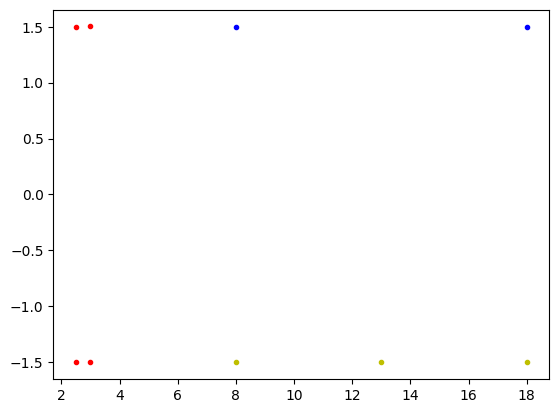

In [71]:
blue_cones = np.array([[12.999739646911621, 7.999739646911621, 18],[1.500197410583496, 1.500197410583496, 1.5]])
yellow_cones = np.array([[12.999739646911621, 7.999739646911621, 18], [-1.499802589416504, -1.499802589416504, -1.5]])
big_orange_cones = np.array([[2.497919797897339, 2.497919797897339, 2.997919797897339, 2.997919797897339], [1.4981417655944824, -1.5018582344055176, -1.4981417655944824, 1.5018582344055176]])


blue=np.transpose(blue_cones)
blue_deleted = np.delete(blue, 0, axis=0)
yellow=np.transpose(yellow_cones)
orange=np.transpose(big_orange_cones)

plt.plot(blue_deleted[:,0], blue_deleted[:,1], 'b.')
plt.plot(yellow[:,0], yellow[:,1], 'y.')
plt.plot(orange[:,0], orange[:,1], 'r.')
plt.show()

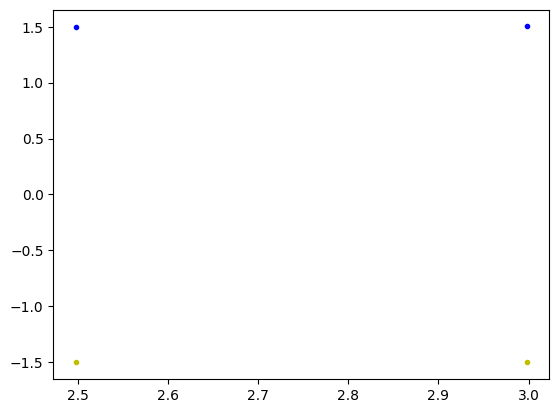

In [72]:
track_bounds = TrackBoundings()
[track_yellow, untrack_yellow], [track_blue, untrack_blue] = track_bounds.define_track_boundings(blue_deleted, yellow, orange, np.array([[]]))
plt.plot(track_yellow[:,0], track_yellow[:,1], 'y.')
plt.plot(track_blue[:,0], track_blue[:,1], 'b.')
plt.show()

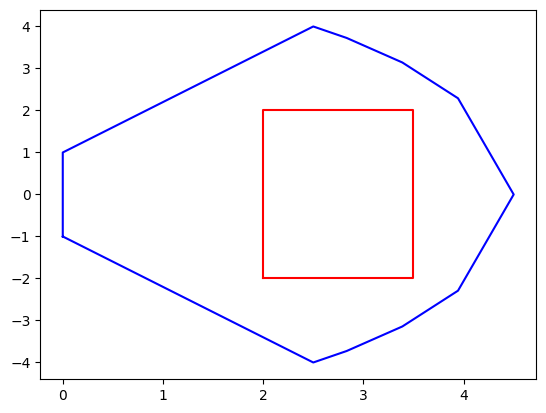

In [28]:
lista = np.array([
    [0.0, -1.0, 0.0],
    [0.0, 1.0, 0.0],
    [2.5, 4.0, 0.0],
    [2.833333333333334, 3.726779962499649, 0],
    [3.388888888888889, 3.1426968052735442, 0],
    [3.944444444444445, 2.2906142364542554, 0],
    [4.5, 0.0, 0],
    [3.944444444444445, -2.2906142364542554, 0],
    [3.388888888888889, -3.1426968052735442, 0],
    [2.833333333333334, -3.726779962499649, 0],
    [2.5, -4.0, 0.0],
    [0.0, -1.0, 0.0]
])
restriccion = np.array([
    [2.0, -2.0, 0.0],
    [2.0, 2.0, 0.0],
    [3.5, 2.0, 0.0],
    [3.5, -2.0, 0.0],
    [2.0, -2.0, 0.0]
])
plt.plot(lista[:,0], lista[:,1], '-', color='blue')
plt.plot(restriccion[:,0], restriccion[:,1], '-', color='red')
plt.show()

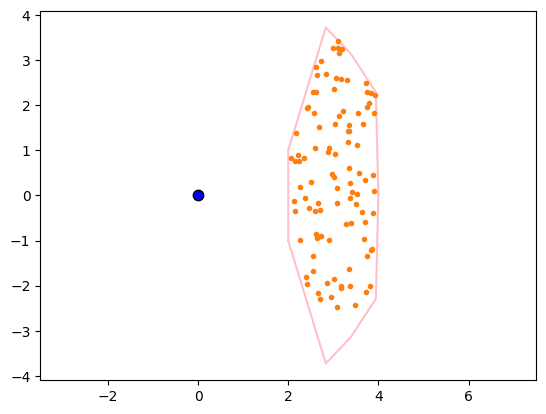

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from scipy.spatial.transform import Rotation

jaw = 0.0
NUM_PARTICULAS = 100

zonaSeleccionPoints = np.array([[2.0, -1.0, 0.0],
                                [2.0, 1.0, 0.0],
                                [2.833333333333334, 3.726779962499649, 0],
                                [3.388888888888889, 3.1426968052735442, 0],
                                [3.944444444444445, 2.2906142364542554, 0],
                                [4, 0.0, 0],
                                [3.944444444444445, -2.2906142364542554, 0],
                                [3.388888888888889, -3.1426968052735442, 0],
                                [2.833333333333334, -3.726779962499649, 0],
                                [2.0, -1.0, 0.0]])
referencia = np.array([0.0, 0.0, 0.0])

def rotar_zona_selección_conos(jaw, reference, plot=False, color='blue'):
    r = Rotation.from_euler('z', jaw, degrees=True)
    zonaSeleccionPointsRot = r.apply(zonaSeleccionPoints)
    zonaSeleccionPointsRot = zonaSeleccionPointsRot + reference
    if plot:
        plt.plot(zonaSeleccionPointsRot[:, 0], zonaSeleccionPointsRot[:, 1], '-', color='#FFC0CB')
        plt.plot(reference[0], reference[1], '.', markerfacecolor=color, markeredgecolor='black', markersize=15)
    return zonaSeleccionPointsRot
def generar_puntos_aleatorios(referencia: np.ndarray, jaw: float, num_puntos: int = NUM_PARTICULAS):
    zonaSeleccionPointsRotado = rotar_zona_selección_conos(jaw, referencia, plot=True)
    x_min = np.min(zonaSeleccionPointsRotado[:, 0])
    x_max = np.max(zonaSeleccionPointsRotado[:, 0])
    y_min = np.min(zonaSeleccionPointsRotado[:, 1])
    y_max = np.max(zonaSeleccionPointsRotado[:, 1])

    aleatorios = []
    while len(aleatorios) < num_puntos:
        aleatorios_x = np.random.uniform(x_min, x_max)
        aleatorios_y = np.random.uniform(y_min, y_max)
        punto = [aleatorios_x, aleatorios_y, 0.0]

        path = mpath.Path(zonaSeleccionPointsRotado[:, :2])
        if path.contains_point(punto[:2]):
            aleatorios.append(punto)

    puntos = np.array(aleatorios)
    # plt.plot(puntos[:, 0], puntos[:, 1], '.', color='black')
    return puntos


puntos = generar_puntos_aleatorios(referencia, jaw, NUM_PARTICULAS)
plt.axis('equal')
plt.plot(puntos[:,0], puntos[:,1], '.')

plt.show()

In [74]:
import pickle

In [75]:
def load_map(file_path):
    with open(file_path, "rb") as fp:
        return pickle.load(fp)
    return

def load_path(file_path):
    return pd.read_csv(file_path)

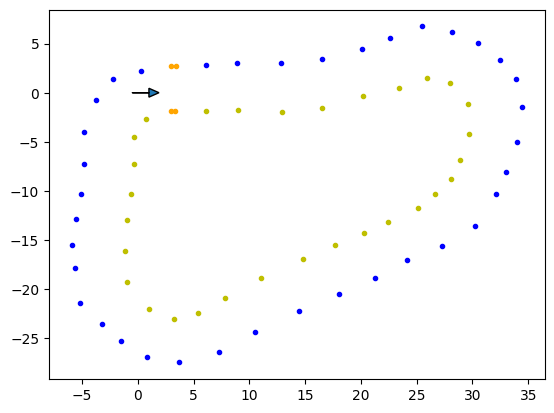

In [76]:
mapa = load_map('track.map')
blue = np.hstack((np.array(mapa[0]), np.zeros((len(mapa[0]), 1))))
yellow = np.hstack((np.array(mapa[1]), np.zeros((len(mapa[1]), 1))))
orange_big = np.hstack((np.array(mapa[2]), np.zeros((len(mapa[2]), 1))))

plt.plot(blue[:, 0], blue[:,1], 'b.')
plt.plot(yellow[:,0], yellow[:,1], 'y.')
plt.plot(orange_big[:,0], orange_big[:, 1], '.', color='orange')
plt.arrow(-0.5, 0, 1.5, 0, head_width=0.9, head_length=0.9, ec='black')
plt.show()

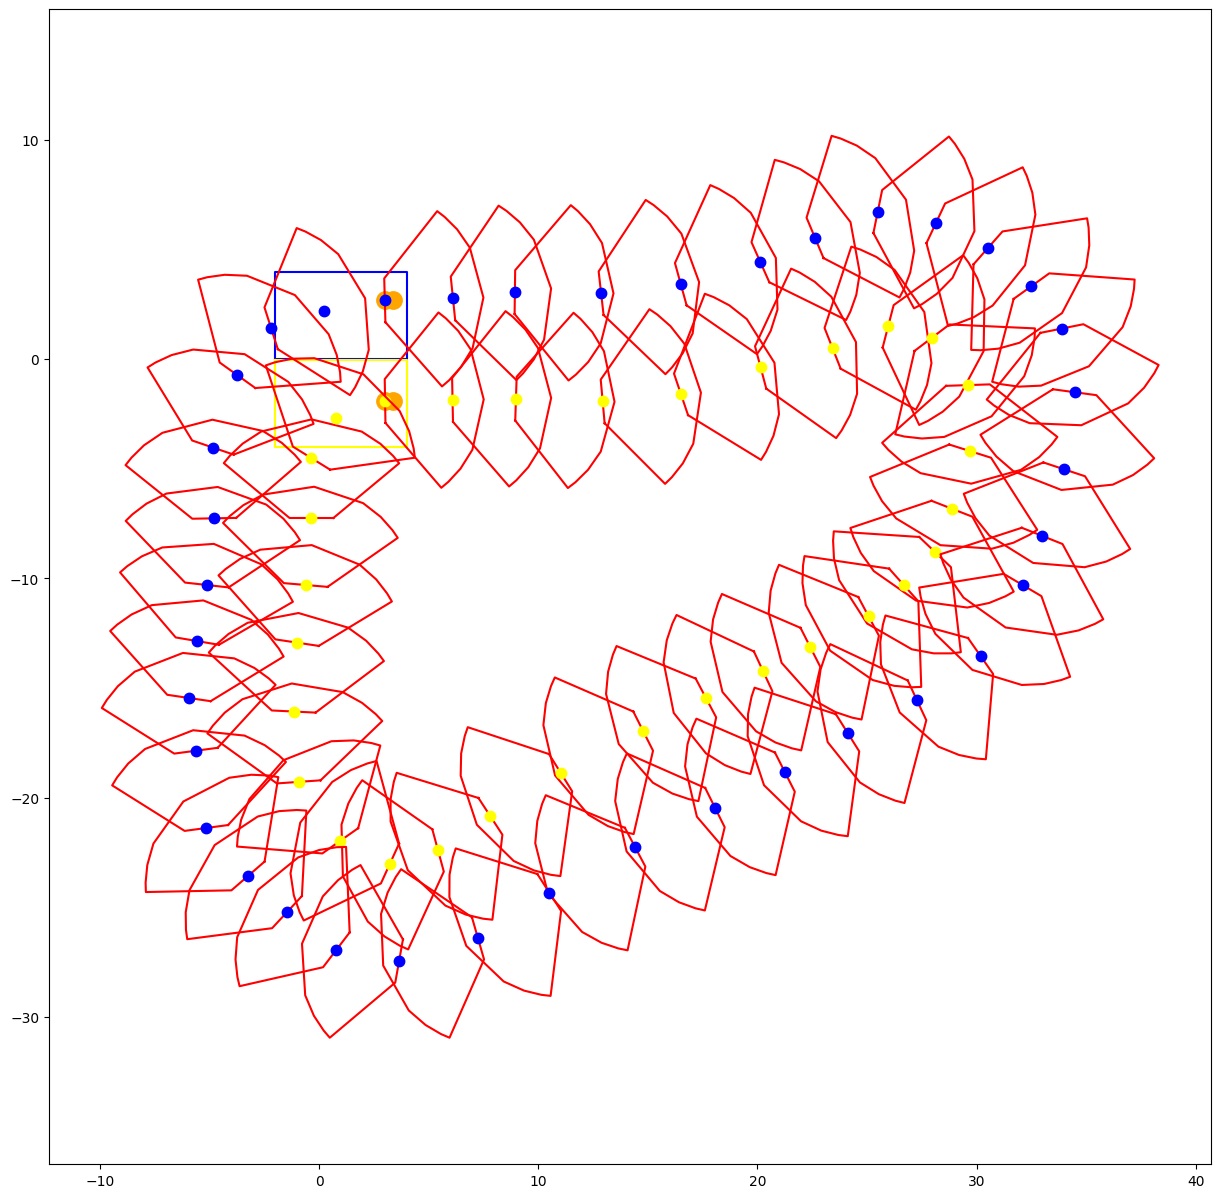

In [98]:
track_bounds = TrackBoundings()
[track_yellow, untrack_yellow], [track_blue, untrack_blue] = track_bounds.define_track_boundings(blue, yellow, orange_big, np.array([[]]), plot=True)

In [99]:
## import numpy as np
from scipy.interpolate import splprep
from scipy.interpolate import splev
from scipy.spatial import Delaunay
class DelaunayTriangulation():

    def __init__(self, conos_azules, conos_amarillos, conos_naranjas, conos_naranjas_grandes):

        ######################
        ###   Parametros   ###
        ######################

        # SPLINE parameters
        # K: Degree of the spline. Cubic splines are recommended.
        self.k = 3
        # S: A smoothing condition.  The amount of smoothness is determined by satisfying the conditions
        self.s = 64
        self.num_waypoints = 40
        ######################

        self.internalNp = None
        self.interpolacion = None

        self.conos_azules = conos_azules
        self.conos_amarillos = conos_amarillos
        self.conos_naranjas_grandes = conos_naranjas_grandes
        self.conos_naranjas = conos_naranjas

        if conos_naranjas_grandes.any():
            print(conos_naranjas)
            # self.conos_naranjas_grandes_exteriores = []
            # self.conos_naranjas_grandes_interiores = []

            for act in conos_naranjas_grandes:
                #if (act.point.y > 0): # Exterior
                if (act[1] > 0): # Exterior    
                    # self.conos_naranjas_grandes_exteriores.append(act)
                    if self.conos_azules.shape[0] > 0:
                        self.conos_azules = np.append(self.conos_azules, [act], axis=0)
                    else:
                        self.conos_azules = np.array([act])
                else: # Interior
                    # self.conos_naranjas_grandes_interiores.append(act)
                    if self.conos_amarillos.shape[0] > 0:
                        self.conos_amarillos = np.append(self.conos_amarillos, [act], axis=0)
                    else:
                        self.conos_amarillos = np.array([act])
            # self.conos_naranjas_grandes = np.array([[o.point.x, o.point.y] for o in conos_naranjas_grandes])      
        if conos_naranjas.any():
            for act in conos_naranjas:
                if (act[1] > 0): #Exterior
                    if self.conos_azules.shape[0] > 0:
                        self.conos_azules = np.append(self.conos_azules, [act], axis=0)
                    else:
                        self.conos_azules = np.array([act])
                else:
                    if self.conos_amarillos.shape[0] > 0:
                        self.conos_amarillos = np.append(self.conos_amarillos, [act], axis=0)
                    else:
                        self.conos_amarillos = np.array([act])
        

    def ordenar_respecto(self, coche, lista):
        return np.array(sorted(lista, key=lambda p: (p[0] - coche[0]) ** 2 + (p[1] - coche[1]) ** 2))

    def getEdges(self, triangle, edges, isEven):
        # t0 t1
        dist_min = 10
        flag = False
        if (isEven[0] + isEven[1] == 1):
            if (abs(triangle[0] - triangle[1]) < dist_min):
                edges[triangle[0], triangle[1]] = 1
                edges[triangle[1], triangle[0]] = 1
            else:
                flag = True
        # t0 t2
        if (isEven[0] + isEven[2] == 1):
            if (abs(triangle[0] - triangle[2]) < dist_min):
                edges[triangle[0], triangle[2]] = 1
                edges[triangle[2], triangle[0]] = 1
            else:
                flag = True
        # t1 t2
        if (isEven[1] + isEven[2] == 1):
            if (abs(triangle[2] - triangle[1]) < dist_min):
                edges[triangle[1], triangle[2]] = 1
                edges[triangle[2], triangle[1]] = 1
            else:
                flag = True

        return edges, flag

    def triangulacion(self, first_point_car):

        nci = len(self.conos_azules)  # Numeros de conos interiores en la lista de conos
        col = 2
        nce = len(self.conos_amarillos)  # Numeros de conos exteriores en la lista de conos
        if (nci > 1 and nce > 1):

            maxConosLado = max(nci, nce)
            P = np.zeros((2 * maxConosLado, col))

            for i in range(0, maxConosLado):
                if (i >= nci):  # Solo quedan conos exteriores
                    P[i * 2] = self.conos_azules[nci - 1]
                    P[i * 2 + 1] = self.conos_amarillos[i]
                elif (i >= nce):  # Solo quedan conos interiores
                    P[i * 2] = self.conos_azules[i]
                    P[i * 2 + 1] = self.conos_amarillos[nce - 1]
                else:  # Quedan de los 2
                    P[i * 2] = self.conos_azules[i]
                    P[i * 2 + 1] = self.conos_amarillos[i]

            internal = []

            xMaxI, yMaxI = self.conos_azules.max(axis=0)
            xMinI, yMinI = self.conos_azules.min(axis=0)

            xMaxE, yMaxE = self.conos_amarillos.max(axis=0)
            xMinE, yMinE = self.conos_amarillos.min(axis=0)

            xMax, yMax = max(xMaxI, xMaxE), max(yMaxI, yMaxE)
            xMin, yMin = min(xMinI, xMinE), min(yMinI, yMinE)

            if (first_point_car): # Si es true se le añade el primer punto                 
                internal.append(np.array(eje_direccion))  # Para despues hacer la trayectoria desde el morro del coche

            # edgesMatrix = np.zeros([P.shape[0], P.shape[0]])
            edgesMatrix = np.zeros([maxConosLado * 2, maxConosLado * 2])

            # Crear triangulacion con constantes
            TR = Delaunay(P)

            s = TR.simplices
            i = 0
            while (i < s.shape[0]):

                x = s[i]
                isEven = x % 2
                if ((isEven[0] == 0 and isEven[1] == 0 and isEven[2] == 0) or (
                        isEven[0] == 1 and isEven[1] == 1 and isEven[2] == 1)):
                    s = np.delete(s, i, 0)
                else:
                    edgesMatrix, flag = self.getEdges(x, edgesMatrix, isEven)
                    if (flag):
                        s = np.delete(s, i, 0)
                    else:
                        i = i + 1
            for fila in range(0, P.shape[0]):
                for columna in range(0, fila):
                    if (edgesMatrix[fila][columna] == 1):  # Es uno interno
                        p1 = P[fila]
                        p2 = P[columna]

                        internal.append(np.array([(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2]))
            
            self.internalNp = np.array(internal)
            
            if (self.k < self.internalNp.shape[0]):
                tck, u = splprep([self.internalNp[:, 0], self.internalNp[:, 1]], k=self.k, s=self.s)
                u = np.linspace(0, 1, num=self.num_waypoints, endpoint=True)
                self.interpolacion = splev(u, tck)

                return self.internalNp, self.interpolacion, P, s, (xMax, xMin), (yMax, yMin)
            else:
                print('No puede haber menos waypoints que el nivel de la interpolacion')
                return None, None, None, None, None, None
        else:
            return None, None, None, None, None, None
        print('Minimo tiene que haber 1 cono exterior e interior')

In [114]:
def calcular_tramos_distancia_trayectoria(trayectoria, num_tramos):
    # Obtener las coordenadas x e y de la trayectoria
    x = trayectoria[:, 0]
    y = trayectoria[:, 1]

    # Calcular las diferencias en las coordenadas x e y
    dx = np.diff(x)
    dy = np.diff(y)

    # Calcular la distancia entre cada par de puntos consecutivos
    distancias = np.sqrt(dx**2 + dy**2)

    # Calcular la distancia total sumando todas las distancias parciales
    distancia_total = np.sum(distancias)

    # Calcular la distancia promedio por tramo
    distancia_promedio = distancia_total / num_tramos

    # Inicializar variables
    inicio_tramo = 0
    fin_tramo = 0
    distancia_actual = 0
    tramos = []

    # Iterar sobre las distancias y encontrar los índices de inicio y fin de cada tramo
    for i, distancia in enumerate(distancias):
        distancia_actual += distancia
        if distancia_actual >= distancia_promedio:
            fin_tramo = i + 1 # Sumar 1 para incluir el punto final en el tramo
            tramos.append((inicio_tramo, fin_tramo))
            distancia_actual = 0
            inicio_tramo = fin_tramo

    return np.array(tramos)

def calcular_trayectoria_global(track_blue, track_yellow, num_tramos, plot=False):    
    '''
    Precondicion: La pista tiene que estar previamente construida, si los conos no estan ordenados no va a funcionar
    '''
    
    tramos_azul = calcular_tramos_distancia_trayectoria(track_blue, num_tramos)
    tramos_amarillo = calcular_tramos_distancia_trayectoria(track_yellow, num_tramos)
    
    if plot:
        plt.title('Trayectoria global')
        plt.plot(track_blue[:, 0], track_blue[:, 1], 'b.')
        plt.plot(track_yellow[:, 0], track_yellow[:, 1], 'y.')
        plt.plot(orange_big[:,0], orange_big[:,1], '.', color='orange')
    
    waypoints = np.empty((0, 2))
    path = np.empty((0, 2))
    
    for i in range(tramos_azul.shape[0]+1):
        
        if i != tramos_azul.shape[0]:
            delaunay = DelaunayTriangulation(track_blue[np.arange(tramos_azul[i][0], tramos_azul[i][1]+1), :2], 
                                             track_yellow[np.arange(tramos_amarillo[i][0], tramos_amarillo[i][1]+1), :2],
                                             np.array([[]]), np.array([[]]))
        else:
            delaunay = DelaunayTriangulation(np.append(track_blue[np.arange(tramos_azul[i-1][1], track_blue.shape[0]), :2],  [track_blue[0,:2]], axis=0), 
                                             np.append(track_yellow[np.arange(tramos_amarillo[i-1][1], track_yellow.shape[0]), :2],  [track_yellow[0,:2]], axis=0),
                                             np.array([[]]), np.array([[]]))
            
        internalNp, interpolacion, P, s, xBounds, yBounds = delaunay.triangulacion(False)
        waypoints = np.concatenate([waypoints, internalNp], axis=0)
        path = np.concatenate([path, np.transpose(interpolacion)], axis = 0)
        
        if plot:  
            if i != tramos_azul.shape[0]:
                # Raya inicio
                plt.plot(np.append(track_blue[tramos_azul[i][0], 0], [track_yellow[tramos_amarillo[i][0], 0]]),
                         np.append(track_blue[tramos_azul[i][0], 1], [track_yellow[tramos_amarillo[i][0], 1]]),
                         '-', color='purple', linewidth=3)

                # Raya fin
                plt.plot(np.append(track_blue[tramos_azul[i][1], 0], [track_yellow[tramos_amarillo[i][1], 0]]),
                     np.append(track_blue[tramos_azul[i][1], 1], [track_yellow[tramos_amarillo[i][1], 1]]),
                     '-', color='purple', linewidth=3)

            plt.plot(internalNp[:, 0], internalNp[:,1], '.', color='red')
            plt.plot(interpolacion[0], interpolacion[1], '-', color='grey')
            plt.triplot(P[:, 0], P[:, 1], s, color='pink')

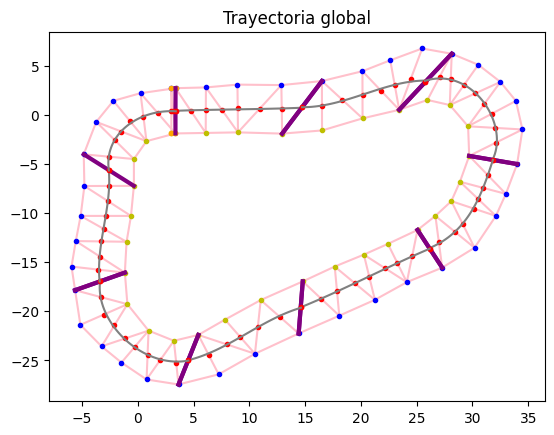

In [115]:
calcular_trayectoria_global(track_blue, track_yellow, 10, True)